# Use UMAP layout

In [1]:
from gensim.models import KeyedVectors

wv = KeyedVectors.load('periodical-clustering/data/2010s/Word2Vec/wv')

In [42]:
import umap
import pandas as pd
from sklearn.preprocessing import normalize
import numpy as np
from sklearn.manifold import TSNE

# 1. 获取所有词和对应向量
VIDs = wv.index_to_key
vectors = wv.vectors     # shape: (num_words, dim)

print(np.linalg.norm(vectors[0]))  # 打印第一个向量的模长

vectors = normalize(vectors)

print(np.linalg.norm(vectors[0]))  # 打印第一个向量的模长

# 2. 降维到2D
tsne_model = TSNE(n_components=2, verbose=1)
embedding_2d = tsne_model.fit_transform(vectors)
# umap_model = umap.UMAP(n_components=2)
# embedding_2d = umap_model.fit_transform(vectors)  # shape: (num_words, 2)

# 3. 放到DataFrame
df_2d = pd.DataFrame({
    'name': VIDs,
    'x': embedding_2d[:, 0],
    'y': embedding_2d[:, 1]
})
df_2d

1.9465287
1.0
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 37594 samples in 0.002s...
[t-SNE] Computed neighbors for 37594 samples in 1.476s...
[t-SNE] Computed conditional probabilities for sample 1000 / 37594
[t-SNE] Computed conditional probabilities for sample 2000 / 37594
[t-SNE] Computed conditional probabilities for sample 3000 / 37594
[t-SNE] Computed conditional probabilities for sample 4000 / 37594
[t-SNE] Computed conditional probabilities for sample 5000 / 37594
[t-SNE] Computed conditional probabilities for sample 6000 / 37594
[t-SNE] Computed conditional probabilities for sample 7000 / 37594
[t-SNE] Computed conditional probabilities for sample 8000 / 37594
[t-SNE] Computed conditional probabilities for sample 9000 / 37594
[t-SNE] Computed conditional probabilities for sample 10000 / 37594
[t-SNE] Computed conditional probabilities for sample 11000 / 37594
[t-SNE] Computed conditional probabilities for sample 12000 / 37594
[t-SNE] Computed conditional probabi

name          x          y
0      2.023817e+08 -67.773888  15.517528
1      1.377736e+08 -68.044762 -55.760235
2      1.257544e+08 -68.087326 -55.743267
3      3.880285e+06 -68.045647 -55.760670
4      1.111554e+08 -54.207256 -61.350956
...             ...        ...        ...
37589  2.764535e+09 -25.799128 -53.157970
37590  2.737185e+09  82.567619  23.749901
37591  2.756162e+09 -42.095943  92.218559
37592  2.737688e+09  71.736549   8.199800
37593  2.764710e+09  -0.508748 -56.385380

[37594 rows x 3 columns]

In [43]:
node_df = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/node.csv')
node_df = node_df.merge(df_2d, on='name').rename(columns={0: 'x', 1: 'y'})
node_df['kmeans_label'] = node_df['kmeans_label'].astype('category')
node_df

name kmeans_label  self_citations  outer_citations  total_cited  \
0       202381698           17          247889          4693463      4941352   
1       137773608           17           33004          2625459      2658463   
2       125754415           17           63700          2527268      2590968   
3         3880285            8           24046          2189773      2213819   
4       111155417           11          129824          2096261      2226085   
...           ...          ...             ...              ...          ...   
20033  2764485818           18               0               28           28   
20034    83454320           13               0               22           22   
20035    16507453           13               0               21           21   
20036   121509672           21               0               14           14   
20037    53107364           11               0               27           27   

       total_references  self_cite_pct          x          y  
0               4080795       0.050166 -67.773888  15.517528  
1                276992       0.012415 -68.044762 -55.760235  
2                834443       0.024585 -68.087326 -55.743267  
3                255821       0.010862 -68.045647 -55.760670  
4                728068       0.058319 -54.207256 -61.350956  
...                 ...            ...        ...        ...  
20033                13       0.000000 -28.899429  34.514915  
20034                 0       0.000000  77.904396  30.927172  
20035                 1       0.000000  89.391991  17.183849  
20036                 0       0.000000 -36.809444  -0.846630  
20037               391       0.000000 -46.384583 -55.823425  

[20038 rows x 9 columns]

# Use NeuLay

In [ ]:
import pandas as pd

node_df = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/node.csv')
layout = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/neulay_results/GATConv_2d/fdl_iter_00501.csv',
                header=None)

In [28]:
node_df = pd.concat([node_df, layout], axis=1).rename(columns={0: 'x', 1: 'y'})
node_df['kmeans_label'] = node_df['kmeans_label'].astype('category')
node_df

name kmeans_label  self_citations  outer_citations  total_cited  \
0       202381698           17          247889          4693463      4941352   
1       137773608           17           33004          2625459      2658463   
2       125754415           17           63700          2527268      2590968   
3         3880285            8           24046          2189773      2213819   
4       111155417           11          129824          2096261      2226085   
...           ...          ...             ...              ...          ...   
20033  2764485818           18               0               28           28   
20034    83454320           13               0               22           22   
20035    16507453           13               0               21           21   
20036   121509672           21               0               14           14   
20037    53107364           11               0               27           27   

       total_references  self_cite_pct         x          y  
0               4080795       0.050166  2.456751  -8.349404  
1                276992       0.012415  2.850538  -8.101215  
2                834443       0.024585  2.728850  -8.102651  
3                255821       0.010862  2.938426  -7.943606  
4                728068       0.058319  3.441973  -7.915849  
...                 ...            ...       ...        ...  
20033                13       0.000000  0.196297 -14.864861  
20034                 0       0.000000 -7.724393  -1.252659  
20035                 1       0.000000 -7.327792  -9.457097  
20036                 0       0.000000  2.999937 -15.689074  
20037               391       0.000000  7.007423  -9.168068  

[20038 rows x 9 columns]

# Load edge

In [44]:
edge_df = pd.read_csv('periodical-clustering/data/2010s/journal_citation_net/edge.csv')

name_to_idx = {name: idx for idx, name in node_df['name'].to_dict().items()}
edge_df['source'] = edge_df['source'].map(name_to_idx)
edge_df['target'] = edge_df['target'].map(name_to_idx)
edge_df

source  target  weight
0           4281    4281    1307
1           4281      58       1
2           4281    6565      10
3           4281    2394       1
4           4281    4970       1
...          ...     ...     ...
19151974   19618   10414       1
19151975   19618    1286       1
19151976   19618    4717       1
19151977   19618    6083       1
19151978   19618       0       1

[19151979 rows x 3 columns]

In [45]:
from datashader.layout import forceatlas2_layout

%time fa2 = forceatlas2_layout(node_df, edge_df)

CPU times: user 2min 40s, sys: 3.18 s, total: 2min 43s
Wall time: 51.5 s


In [65]:
cluster2color = {0: '#8FA329', 1: '#D26B04', 2: '#FF5C29', 3: '#A679FF', 4: '#0099FF',
                 5: '#FF7C80', 6: '#FFCC00', 7: '#7030A0', 8: '#000099', 9: '#92D050',
                 10: '#FC9320', 11: '#9A0000', 12: '#FE0000', 13: '#375623', 14: '#D20000',
                 15: '#FBFF57', 16: '#CC00FF', 17: '#336699', 18: '#85D6FF', 19: '#6C0000',
                 20: '#9900CC', 21: '#0000F2', 22: '#CCB3FF', 23: '#16A90F', 24: '#187402', 
                 25: '#66FF66'}

cvsopts = dict(plot_height=3000, plot_width=3000)

In [75]:
import datashader as ds
import datashader.transfer_functions as tf

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, color_key=cluster2color, alpha=255), px=5, name=name)


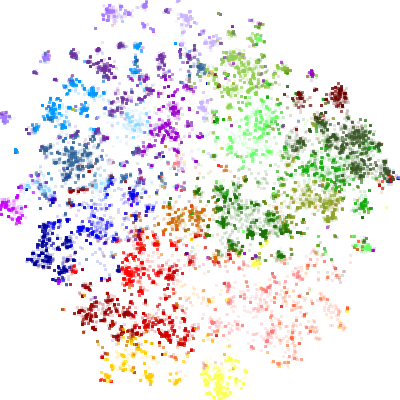
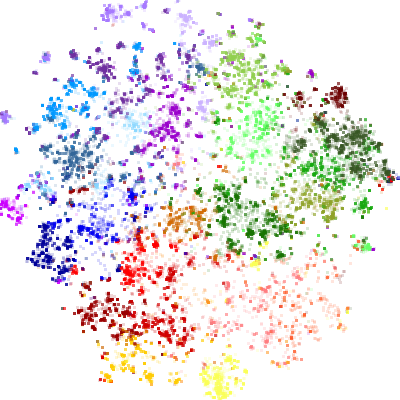

In [ ]:
tf.Images(nodesplot(node_df, "Original", cat="kmeans_label"), nodesplot(fa2,"ForceAtlas2", cat="kmeans_label"))

In [48]:
from datashader.bundling import connect_edges, hammer_bundle

In [49]:
%time o_edges = connect_edges(node_df, edge_df)

CPU times: user 1min 6s, sys: 6.78 s, total: 1min 13s
Wall time: 1min 13s


In [50]:
%time fa2_edges = connect_edges(fa2, edge_df)

CPU times: user 1min 6s, sys: 5.28 s, total: 1min 11s
Wall time: 1min 11s


In [55]:
decay = 0.7
bw = 0.05

In [56]:
%time bundled_o_edges = hammer_bundle(node_df, edge_df, decay=decay, initial_bandwidth=bw, use_dask=True) 

CPU times: user 3h 2min 14s, sys: 30min 55s, total: 3h 33min 9s
Wall time: 53min 10s


In [12]:
%time bundled_fa2_edges = hammer_bundle(node_df, edge_df, use_dask=True)

CPU times: user 2h 48min 5s, sys: 30min 36s, total: 3h 18min 41s
Wall time: 52min 42s


In [21]:
bundled_o_edges

x         y  weight
0          12.856360  5.609211  1307.0
1          12.856360  5.609211  1307.0
2                NaN       NaN     NaN
3          12.856360  5.609211     1.0
4          12.799636  5.662372     1.0
...              ...       ...     ...
929930658   8.273881  9.201096     1.0
929930659   8.319056  9.109937     1.0
929930660   8.356934  9.026018     1.0
929930661   8.251241  9.114262     1.0
929930662        NaN       NaN     NaN

[929930663 rows x 3 columns]

In [31]:
bundled_o_edges.to_parquet(f'periodical-clustering/data/2010s/journal_citation_net/bundled_edges_bw_{bw}_d_{decay}.parquet')

In [85]:
cvsopts = dict(plot_height=2000, plot_width=2000)

def nodesplot(nodes, name=None, canvas=None, cat=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    aggregator=None if cat is None else ds.count_cat(cat)
    agg=canvas.points(nodes,'x','y',aggregator)
    return tf.spread(tf.shade(agg, color_key=cluster2color, min_alpha=255), px=3, name=name)

def edgesplot(edges, name=None, canvas=None):
    canvas = ds.Canvas(**cvsopts) if canvas is None else canvas
    return tf.shade(canvas.line(edges, 'x','y', agg=ds.count()), cmap=['lightgray', 'gray'], min_alpha=0,name=name)

def graphplot(nodes, edges, name="", canvas=None, cat=None):
    if canvas is None:
        xr = nodes.x.min(), nodes.x.max()
        yr = nodes.y.min(), nodes.y.max()
        canvas = ds.Canvas(x_range=xr, y_range=yr, **cvsopts)

    np = nodesplot(nodes, name + " nodes", canvas, cat)
    ep = edgesplot(edges, name + " edges", canvas)
    return tf.stack(ep, np, how="over", name=name)


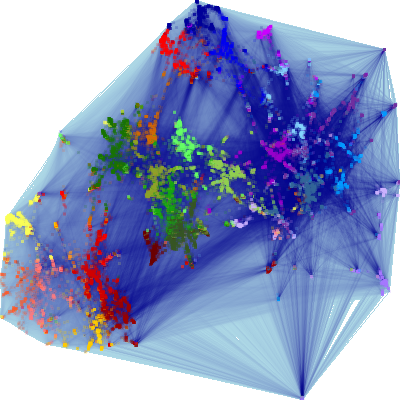
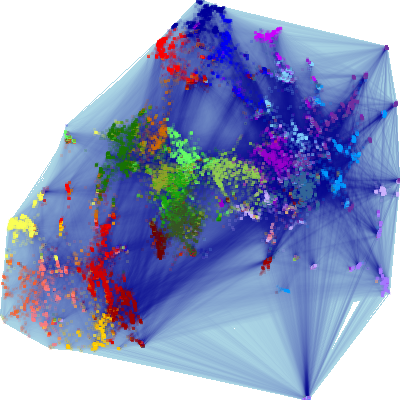
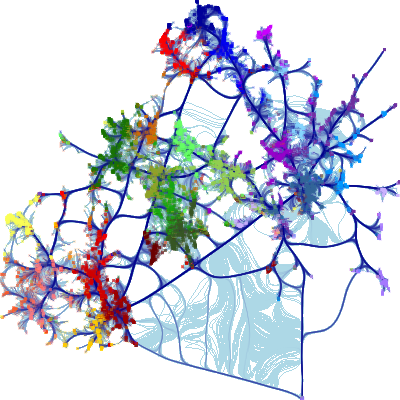
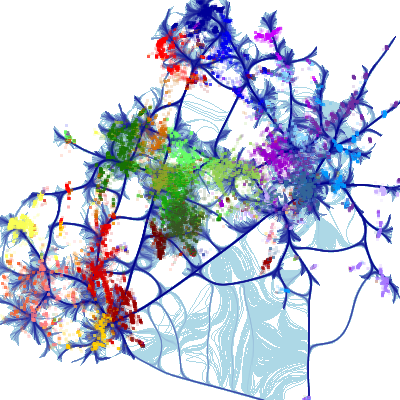

In [17]:
fa2_d = graphplot(fa2, fa2_edges, "ForceAtlas2", cat="kmeans_label")
o_d = graphplot(node_df, o_edges, "Original", cat="kmeans_label")
o_b = graphplot(node_df, bundled_o_edges, "Original, bundled", cat="kmeans_label")
fa2_b = graphplot(fa2, bundled_fa2_edges, "ForceAtlas2, bundled", cat="kmeans_label")

tf.Images(o_d, fa2_d, o_b, fa2_b).cols(2)

In [79]:
node_df

name kmeans_label  self_citations  outer_citations  total_cited  \
0       202381698           17          247889          4693463      4941352   
1       137773608           17           33004          2625459      2658463   
2       125754415           17           63700          2527268      2590968   
3         3880285            8           24046          2189773      2213819   
4       111155417           11          129824          2096261      2226085   
...           ...          ...             ...              ...          ...   
20033  2764485818           18               0               28           28   
20034    83454320           13               0               22           22   
20035    16507453           13               0               21           21   
20036   121509672           21               0               14           14   
20037    53107364           11               0               27           27   

       total_references  self_cite_pct          x          y  
0               4080795       0.050166 -67.773888  15.517528  
1                276992       0.012415 -68.044762 -55.760235  
2                834443       0.024585 -68.087326 -55.743267  
3                255821       0.010862 -68.045647 -55.760670  
4                728068       0.058319 -54.207256 -61.350956  
...                 ...            ...        ...        ...  
20033                13       0.000000 -28.899429  34.514915  
20034                 0       0.000000  77.904396  30.927172  
20035                 1       0.000000  89.391991  17.183849  
20036                 0       0.000000 -36.809444  -0.846630  
20037               391       0.000000 -46.384583 -55.823425  

[20038 rows x 9 columns]


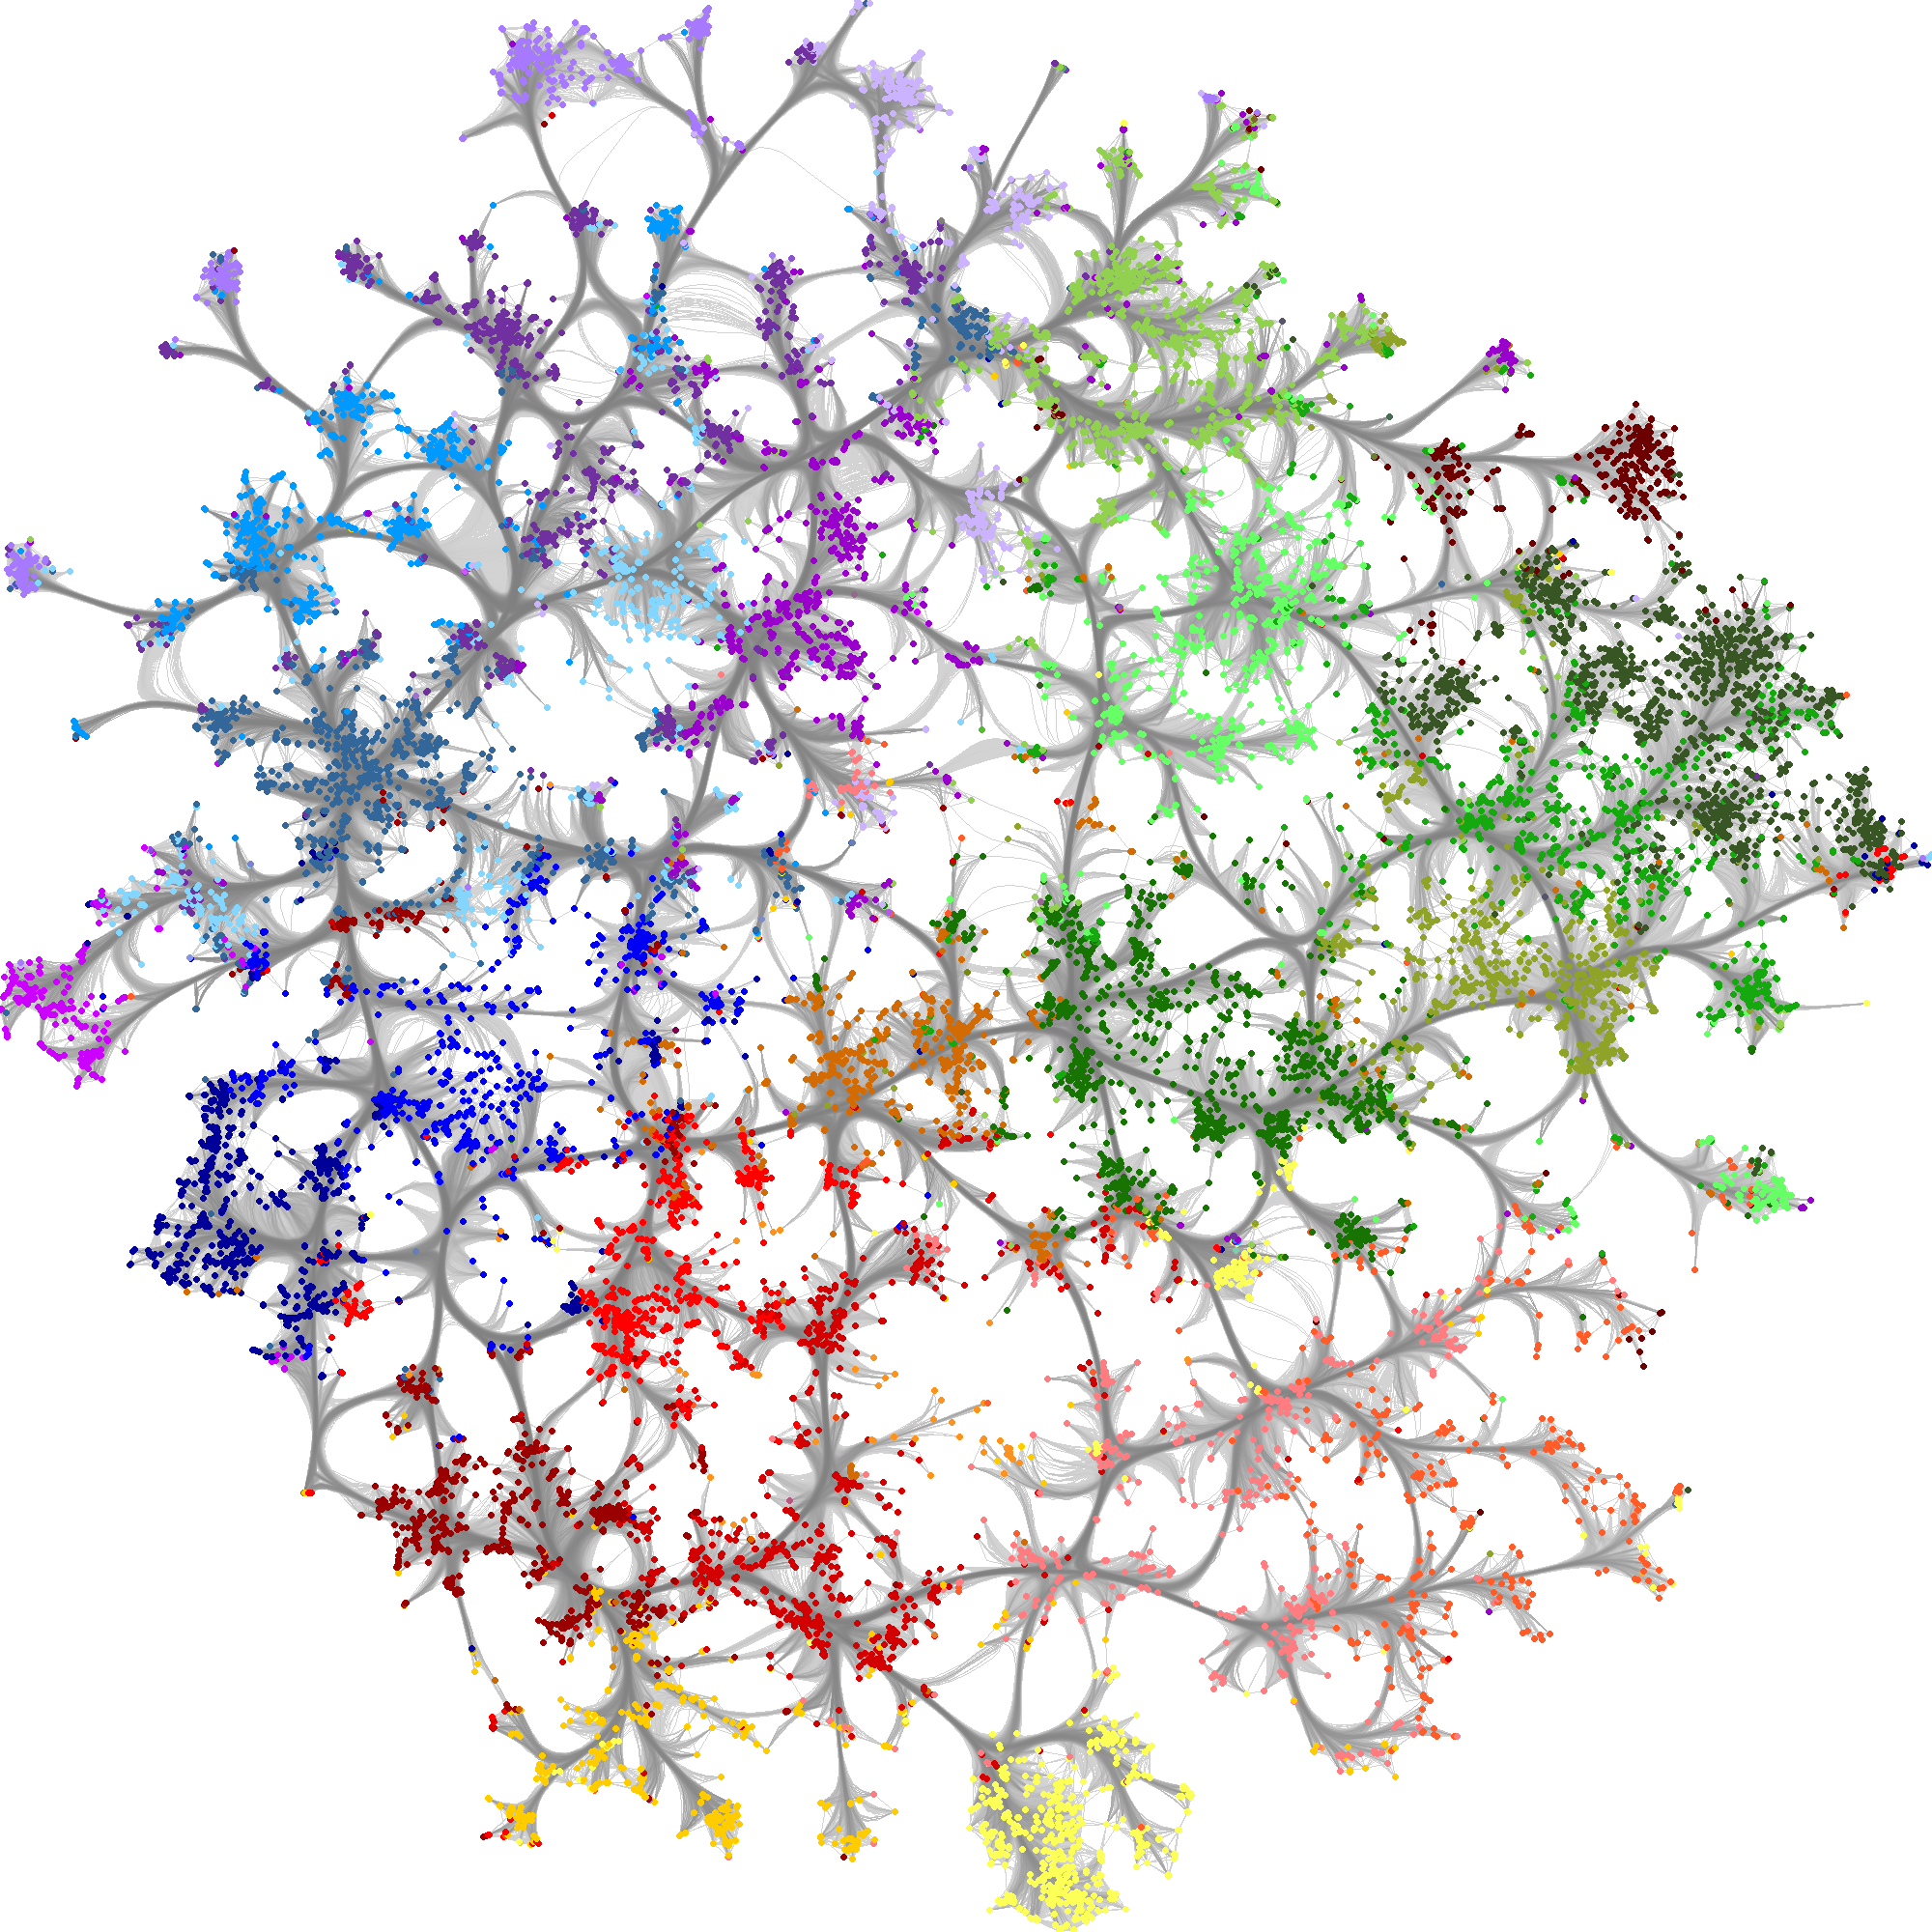

In [86]:
tf.Images(graphplot(node_df, bundled_o_edges, f"d={decay}, bw={bw}", cat="kmeans_label"))

In [90]:
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt
import numpy as np

# Datashader画边
xr = (node_df['x'].min(), node_df['x'].max())
yr = (node_df['y'].min(), node_df['y'].max())
canvas = ds.Canvas(plot_width=2000, plot_height=2000, x_range=xr, y_range=yr)
agg = canvas.line(bundled_o_edges, 'x', 'y', agg=ds.count())
img = tf.shade(agg, cmap=['lightgray', 'gray'])
bg_img = np.asarray(img.to_pil())


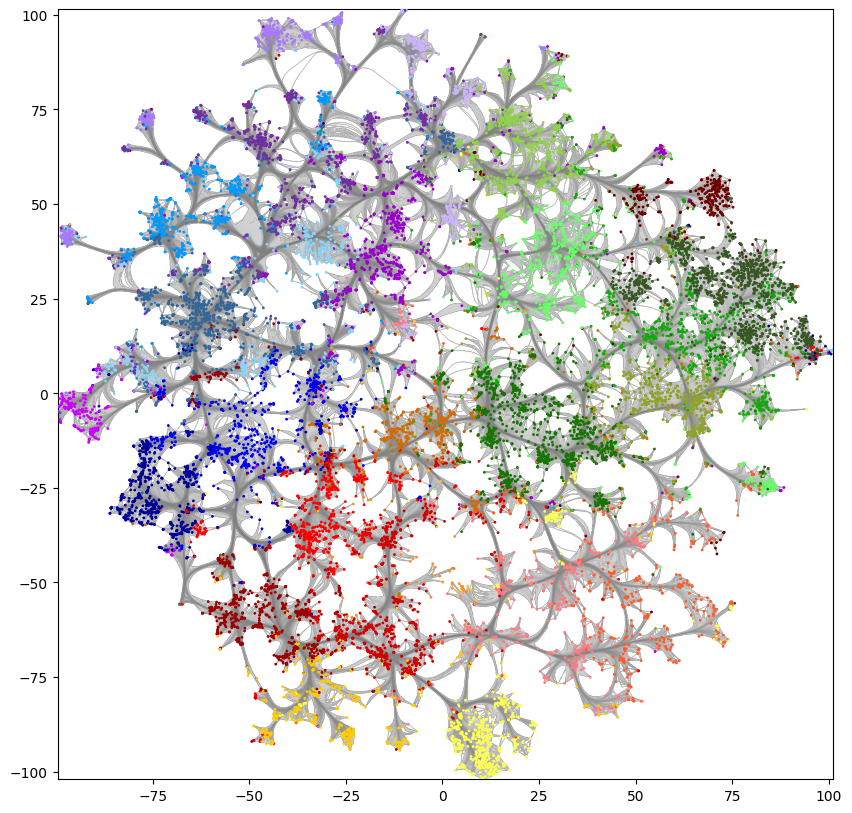

In [110]:
# Matplotlib画点
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(bg_img, aspect='auto',
          extent=[canvas.x_range[0], canvas.x_range[1], canvas.y_range[0], canvas.y_range[1]])

# sizes = 1 + 99 * (node_df['total_cited'] - node_df['total_cited'].min()) / (node_df['total_cited'].max() - node_df['total_cited'].min())
ax.scatter(node_df['x'], node_df['y'], s=1, c=node_df['kmeans_label'].map(cluster2color), alpha=1, zorder=10)

ax.set_xlim(canvas.x_range)
ax.set_ylim(canvas.y_range)
plt.show()